# Environment Setup

In [70]:
# library imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import re

import yfinance as yf

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

from xgboost import XGBClassifier
import keras

In [ ]:
# notebook settings
import warnings
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

pd.set_option('display.max_columns', 100)

In [ ]:
# mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

# data directory
data_dir = "/content/drive/MyDrive/mit/fin_mkt/15.433 Final Project"
output_dir = "/content/drive/MyDrive/mit/fin_mkt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Loading the Data

In [ ]:
prices = pd.read_excel("{}/RLGPrices.xlsx".format(data_dir))
factors = pd.read_csv("{}/Factors.csv".format(data_dir))

prices.head()
prices.shape

factors.head()
factors.shape

,Dates,LEN UN Equity,MSI UN Equity,TPX UN Equity,9980328D UN Equity,NSC UN Equity,PRI UN Equity,2297634D UN Equity,AL UN Equity,RTN UN Equity,PFPT UQ Equity,LUV UN Equity,BPYU UW Equity,CMD UN Equity,FRCB UN Equity,AAL UW Equity,CERN UW Equity,HAS UW Equity,PE UN Equity,BIIB UW Equity,FOXA UW Equity,FOX UW Equity,TROW UW Equity,PARA UN Equity,XLNX UW Equity,HOLX UW Equity,TWTR UN Equity,CTXS UW Equity,ETFC UW Equity,SWKS UW Equity,VOYA UN Equity,SUI UN Equity,HSIC UW Equity,ATUS UN Equity,FFIV UW Equity,AKAM UW Equity,ICE UN Equity,DFS UN Equity,LAZ UN Equity,PANW UN Equity,ATH UN Equity,2499073D UN Equity,GWRE UN Equity,SNV UN Equity,PD UN Equity,MXIM UW Equity,MGM UN Equity,HXL UN Equity,ZNGA UW Equity,SEIC UW Equity,...,TTEK US Equity,TW US Equity,TWLO US Equity,TXG US Equity,TXN US Equity,TXRH US Equity,TYL US Equity,U US Equity,UBER US Equity,UHAL US Equity,UHAL/B US Equity,UI US Equity,ULTA US Equity,UNH US Equity,UNP US Equity,URI US Equity,UWMC US Equity,V US Equity,VEEV US Equity,VKTX US Equity,VLTO US Equity,VMC US Equity,VNOM US Equity,VRSK US Equity,VRSN US Equity,VRT US Equity,VRTX US Equity,VST US Equity,VVV US Equity,WAT US Equity,WDAY US Equity,WEN US Equity,WEX US Equity,WFRD US Equity,WH US Equity,WING US Equity,WM US Equity,WMS US Equity,WSC US Equity,WSM US Equity,WST US Equity,WU US Equity,WYNN US Equity,XP US Equity,XPO US Equity,YETI US Equity,YUM US Equity,ZBRA US Equity,ZS US Equity,ZTS US Equity
0,2010-06-01,16.3006,27.4399,7.9425,64.430,55.03,23.74,NaN,NaN,51.95,NaN,12.20,NaN,7.3244,NaN,NaN,20.4750,NaN,NaN,43.494,NaN,NaN,48.71,14.08,23.90,14.63,NaN,34.3678,14.20,15.71,NaN,28.58,21.722,NaN,67.76,39.50,23.166,13.18,30.64,NaN,NaN,NaN,NaN,19.18,NaN,17.55,12.17,15.40,NaN,20.79,...,4.350,NaN,NaN,NaN,24.3500,14.31,16.05,NaN,NaN,4.9570,NaN,NaN,24.75,28.98,35.155,12.21,NaN,17.8725,NaN,NaN,NaN,49.79,NaN,29.70,27.21,NaN,34.19,NaN,NaN,67.51,NaN,4.44,30.76,NaN,NaN,NaN,31.97,NaN,NaN,14.345,19.250,15.69,81.53,NaN,1.9081,NaN,29.1145,26.97,NaN,NaN
1,2010-06-02,16.5202,28.0542,8.1600,65.788,56.69,23.90,NaN,NaN,52.94,NaN,12.62,NaN,7.3867,NaN,NaN,20.9825,NaN,NaN,44.535,NaN,NaN,50.09,14.63,24.66,14.72,NaN,35.3632,14.99,16.61,NaN,28.62,22.365,NaN,69.28,41.27,24.280,13.47,31.51,NaN,NaN,NaN,NaN,19.67,NaN,17.83,12.47,16.27,NaN,21.25,...,4.432,NaN,NaN,NaN,24.7600,14.80,16.20,NaN,NaN,5.0770,NaN,NaN,23.59,29.91,36.290,12.62,NaN,17.8125,NaN,NaN,NaN,51.04,NaN,30.26,27.88,NaN,35.41,NaN,NaN,69.59,NaN,4.51,31.58,NaN,NaN,NaN,32.68,NaN,NaN,14.345,19.745,15.76,83.19,NaN,1.8942,NaN,29.7760,27.16,NaN,NaN
2,2010-06-03,16.2507,28.1361,8.1375,66.037,56.80,23.61,NaN,NaN,53.08,NaN,12.61,NaN,7.5067,NaN,NaN,21.1100,NaN,NaN,45.337,NaN,NaN,49.47,14.76,25.23,15.27,NaN,35.7136,15.06,16.78,NaN,28.98,22.416,NaN,71.96,43.08,24.244,13.52,31.96,NaN,NaN,NaN,NaN,19.88,NaN,18.03,12.75,16.91,NaN,21.42,...,4.498,NaN,NaN,NaN,25.0400,15.02,16.58,NaN,NaN,5.0330,NaN,NaN,23.90,30.46,36.610,12.55,NaN,18.2100,NaN,NaN,NaN,51.43,NaN,30.71,28.89,NaN,35.54,NaN,NaN,70.50,NaN,4.51,32.06,NaN,NaN,NaN,32.80,NaN,NaN,14.400,19.850,16.15,84.16,NaN,1.8942,NaN,30.1427,28.08,NaN,NaN
3,2010-06-04,15.4422,27.3989,7.6175,64.473,53.40,22.77,NaN,NaN,51.47,NaN,12.02,NaN,7.2711,NaN,NaN,20.3950,NaN,NaN,44.075,NaN,NaN,48.00,13.93,24.94,14.79,NaN,34.5430,14.07,16.06,NaN,26.81,21.558,NaN,69.01,41.94,23.618,12.86,31.56,NaN,NaN,NaN,NaN,18.62,NaN,17.11,12.15,16.02,NaN,20.97,...,4.240,NaN,NaN,NaN,24.1775,14.25,16.02,NaN,NaN,4.5165,NaN,NaN,23.16,30.34,34.665,11.65,NaN,18.0325,NaN,NaN,NaN,47.95,NaN,30.02,28.29,NaN,34.45,NaN,NaN,66.54,NaN,4.30,30.21,NaN,NaN,NaN,31.56,NaN,NaN,13.730,18.890,15.63,79.81,NaN,1.8666,NaN,29.3805,26.96,NaN,NaN
4,2010-06-07,14.7334,26.9074,7.4300,64.430,52.19,21.69,NaN,NaN,50.72,NaN,11.66,NaN,7.0800,NaN,NaN,19.8375,NaN,NaN,43.881,NaN,NaN,47.12,13.41,24.29,14.41,NaN,33.9299,13.13,15.46,NaN,26.37,21.334,NaN,67.00,41.22,23.394,12.43,31.53,NaN,NaN,NaN,NaN,17.78,NaN,16.66,11.01,15.32,NaN,20.34,...,4.084,NaN,NaN,NaN,23.6700,13.85,15.99,NaN,NaN,4.4990,NaN,NaN,22.23,30.46,34.050,

(3785, 1740)

,Date,Ticker,Variable,Value
0,2010-12-31,AAL,PE,NaN
1,2010-12-31,AAL,EPS,-1.410
2,2010-12-31,AAL,RATING,3.929
3,2010-12-31,AAL,REVENUE,NaN
4,2010-12-31,AAL,DE,NaN


(256424, 4)

In [ ]:
prices["Dates"] = pd.to_datetime(prices["Dates"])
prices.set_index("Dates", inplace=True)

In [ ]:
growth_data["Log_Returns"] = np.log(
    growth_data["Adj Close"] / growth_data["Adj Close"].shift(1)
)
growth_data = growth_data.dropna()

growth_data.reset_index(inplace=True)
print(growth_data[["Date", "Adj Close", "Log_Returns"]])

Price                       Date    Adj Close Log_Returns
Ticker                                   ^RLG            
0      2010-05-28 00:00:00+00:00   485.649994   -0.010121
1      2010-06-01 00:00:00+00:00   479.140015   -0.013495
2      2010-06-02 00:00:00+00:00   490.670013    0.023779
3      2010-06-03 00:00:00+00:00   493.769989    0.006298
4      2010-06-04 00:00:00+00:00   477.429993   -0.033652
...                          ...          ...         ...
3646   2024-11-22 00:00:00+00:00  3967.550049    0.001423
3647   2024-11-25 00:00:00+00:00  3970.429932    0.000726
3648   2024-11-26 00:00:00+00:00  4006.989990    0.009166
3649   2024-11-27 00:00:00+00:00  3977.260010   -0.007447
3650   2024-11-29 00:00:00+00:00  4009.199951    0.007999

[3651 rows x 3 columns]


In [ ]:
factors["Date"] = pd.to_datetime(factors["Date"])
factors_pivot = factors.pivot_table(
    index=["Date", "Ticker"],
    columns="Variable",
    values="Value"
).reset_index()

factors_pivot.head()
factors_pivot.shape

Variable,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,REVENUE,ROA,ROE,ROIC,SHARESOUT
0,2010-11-30,0167866D,76.2621,509.071,0.2973,3445.539,56.2412,4.556,NaN,1.2350,2.6568,4.9080,302.40729
1,2010-11-30,0203524D,122.6102,451.600,1.2400,850.500,19.0839,2.556,NaN,12.7963,46.8192,18.8763,242.83430
2,2010-11-30,0966576D,0.0000,110.400,1.4000,855.900,19.0267,3.706,NaN,7.8897,9.5869,8.7006,57.25360
3,2010-11-30,0991739D,29.1482,137.845,2.2000,823.379,29.6981,4.333,NaN,9.3151,13.4465,9.2213,48.20770
4,2010-11-30,1255459D,69.2959,612.397,2.0600,4438.029,22.3606,4.684,NaN,4.0673,8.9383,6.5693,186.72760


(15989, 13)

In [ ]:
factors = factors_pivot.drop("REVENUE", axis=1)
factors.head()
factors.shape

Variable,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,ROA,ROE,ROIC,SHARESOUT
0,2010-11-30,0167866D,76.2621,509.071,0.2973,3445.539,56.2412,4.556,1.2350,2.6568,4.9080,302.40729
1,2010-11-30,0203524D,122.6102,451.600,1.2400,850.500,19.0839,2.556,12.7963,46.8192,18.8763,242.83430
2,2010-11-30,0966576D,0.0000,110.400,1.4000,855.900,19.0267,3.706,7.8897,9.5869,8.7006,57.25360
3,2010-11-30,0991739D,29.1482,137.845,2.2000,823.379,29.6981,4.333,9.3151,13.4465,9.2213,48.20770
4,2010-11-30,1255459D,69.2959,612.397,2.0600,4438.029,22.3606,4.684,4.0673,8.9383,6.5693,186.72760


(15989, 12)

In [ ]:
# get the daily returns for each ticker
eqreturns = np.log(
    prices / prices.shift(1)
)
eqreturns = eqreturns.reset_index().melt(
    id_vars="Dates",
    var_name="Ticker",
    value_name="Log_Returns"
)
eqreturns.head()
eqreturns.shape

# group by year and ticker to get the annual return
eqreturns["Year"] = eqreturns["Dates"].dt.year
eqreturns = eqreturns.groupby(["Year", "Ticker"])["Log_Returns"].sum().reset_index()

# clean the ticker
eqreturns["Ticker"] = eqreturns["Ticker"].apply(lambda x: x.split(" ")[0])
eqreturns.head()
eqreturns.shape

,Dates,Ticker,Log_Returns
0,2010-06-01,LEN UN Equity,NaN
1,2010-06-02,LEN UN Equity,0.013382
2,2010-06-03,LEN UN Equity,-0.016448
3,2010-06-04,LEN UN Equity,-0.051032
4,2010-06-07,LEN UN Equity,-0.046987


(6582115, 3)

,Year,Ticker,Log_Returns
0,2010,0167866D,0.047984
1,2010,0203524D,0.047253
2,2010,0966576D,0.034819
3,2010,0991739D,0.283247
4,2010,1255459D,0.137429


(26085, 3)

In [ ]:
# truncate each ticker name upto the first space
eqreturns["Ticker"] = eqreturns["Ticker"].apply(lambda x: x.split(" ")[0])
eqreturns.head()
eqreturns.shape

In [ ]:
# merge the dataframes
factors["Year"] = factors["Date"].dt.year

merged_data = pd.merge(
    factors, eqreturns, on=["Year", "Ticker"], how="inner"
)
merged_data.head()
merged_data.shape

,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,ROA,ROE,ROIC,SHARESOUT,Year,Log_Returns
0,2010-11-30,0167866D,76.2621,509.071,0.2973,3445.539,56.2412,4.556,1.2350,2.6568,4.9080,302.40729,2010,0.047984
1,2010-11-30,0203524D,122.6102,451.600,1.2400,850.500,19.0839,2.556,12.7963,46.8192,18.8763,242.83430,2010,0.047253
2,2010-11-30,0966576D,0.0000,110.400,1.4000,855.900,19.0267,3.706,7.8897,9.5869,8.7006,57.25360,2010,0.034819
3,2010-11-30,0991739D,29.1482,137.845,2.2000,823.379,29.6981,4.333,9.3151,13.4465,9.2213,48.20770,2010,0.283247
4,2010-11-30,1255459D,69.2959,612.397,2.0600,4438.029,22.3606,4.684,4.0673,8.9383,6.5693,186.72760,2010,0.137429


(21284, 14)

In [ ]:
# data for Russell growth index as a whole
tickers = {
    "Russell_1000_Growth": "^RLG"
}
start_date, end_date = "2010-05-27", "2024-12-02"
growth_data = yf.download(
    tickers["Russell_1000_Growth"],
    start=start_date, end=end_date
)

growth_data.head()
growth_data.shape

# compute log returns based on Adj Close
growth_data["Log_Returns_Russell"] = np.log(
    growth_data["Adj Close"] / growth_data["Adj Close"].shift(1)
)

# get annual returns by grouping by year
growth_data["Year"] = growth_data.index.year
growth_data = growth_data.groupby("Year")["Log_Returns_Russell"].sum().reset_index()
growth_data.head()
growth_data.shape

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,^RLG,^RLG,^RLG,^RLG,^RLG,^RLG
Date,,,,,,
2010-05-27 00:00:00+00:00,490.589996,490.589996,490.730011,476.220001,476.220001,0
2010-05-28 00:00:00+00:00,485.649994,485.649994,490.579987,483.429993,490.579987,0
2010-06-01 00:00:00+00:00,479.140015,479.140015,488.880005,478.709991,485.649994,0
2010-06-02 00:00:00+00:00,490.670013,490.670013,490.720001,479.040009,479.040009,0
2010-06-03 00:00:00+00:00,493.769989,493.769989,494.410004,488.920013,490.640015,0


(3652, 6)

,Year,Log_Returns_Russell
0,2010,0.158187
1,2011,0.010748
2,2012,0.124873
3,2013,0.271935
4,2014,0.106975


(15, 2)

In [ ]:
# merge Russell growth data with our equities dataframe
merged_data = pd.merge(
    merged_data, growth_data, on="Year", how="inner"
)
merged_data.head()
merged_data.shape

,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,ROA,ROE,ROIC,SHARESOUT,Year,Log_Returns,Log_Returns_Russell
0,2010-11-30,0167866D,76.2621,509.071,0.2973,3445.539,56.2412,4.556,1.2350,2.6568,4.9080,302.40729,2010,0.047984,0.158187
1,2010-11-30,0203524D,122.6102,451.600,1.2400,850.500,19.0839,2.556,12.7963,46.8192,18.8763,242.83430,2010,0.047253,0.158187
2,2010-11-30,0966576D,0.0000,110.400,1.4000,855.900,19.0267,3.706,7.8897,9.5869,8.7006,57.25360,2010,0.034819,0.158187
3,2010-11-30,0991739D,29.1482,137.845,2.2000,823.379,29.6981,4.333,9.3151,13.4465,9.2213,48.20770,2010,0.283247,0.158187
4,2010-11-30,1255459D,69.2959,612.397,2.0600,4438.029,22.3606,4.684,4.0673,8.9383,6.5693,186.72760,2010,0.137429,0.158187


(21284, 15)

In [ ]:
merged_data.to_csv("{}/yearly_classification_data.csv".format(output_dir), index=False)

# Data Preprocessing

In [ ]:
# populate the labels
# 1=beats the Russel for that year, 0=doesn't
# can get fancier with sorting and focussing only on the top/bottom 10 percentile

merged_data["Label"] = np.where(
    merged_data["Log_Returns"] > merged_data["Log_Returns_Russell"], 1, 0
)
merged_data.head()
merged_data.shape

merged_data["Label"].value_counts()

,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,ROA,ROE,ROIC,SHARESOUT,Year,Log_Returns,Log_Returns_Russell,Label
0,2010-11-30,0167866D,76.2621,509.071,0.2973,3445.539,56.2412,4.556,1.2350,2.6568,4.9080,302.40729,2010,0.047984,0.158187,0
1,2010-11-30,0203524D,122.6102,451.600,1.2400,850.500,19.0839,2.556,12.7963,46.8192,18.8763,242.83430,2010,0.047253,0.158187,0
2,2010-11-30,0966576D,0.0000,110.400,1.4000,855.900,19.0267,3.706,7.8897,9.5869,8.7006,57.25360,2010,0.034819,0.158187,0
3,2010-11-30,0991739D,29.1482,137.845,2.2000,823.379,29.6981,4.333,9.3151,13.4465,9.2213,48.20770,2010,0.283247,0.158187,1
4,2010-11-30,1255459D,69.2959,612.397,2.0600,4438.029,22.3606,4.684,4.0673,8.9383,6.5693,186.72760,2010,0.137429,0.158187,0


(21284, 16)

,count
Label,
0,11847
1,9437


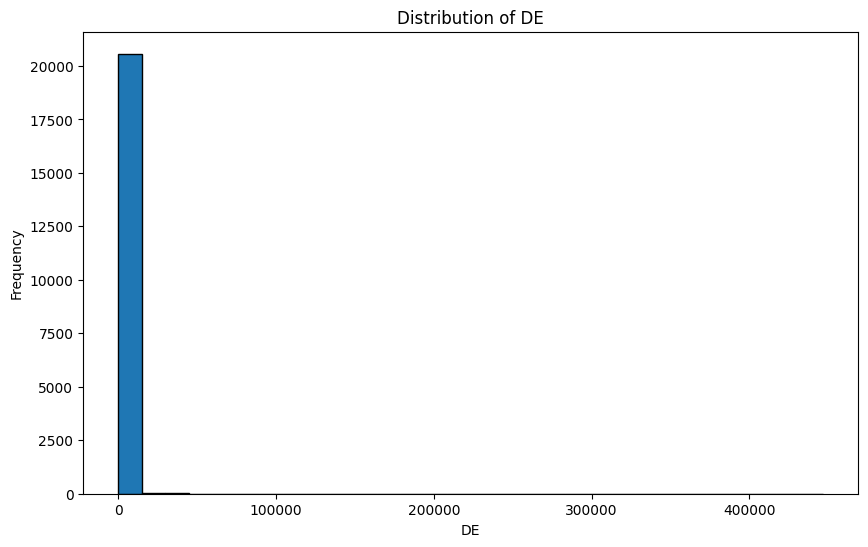

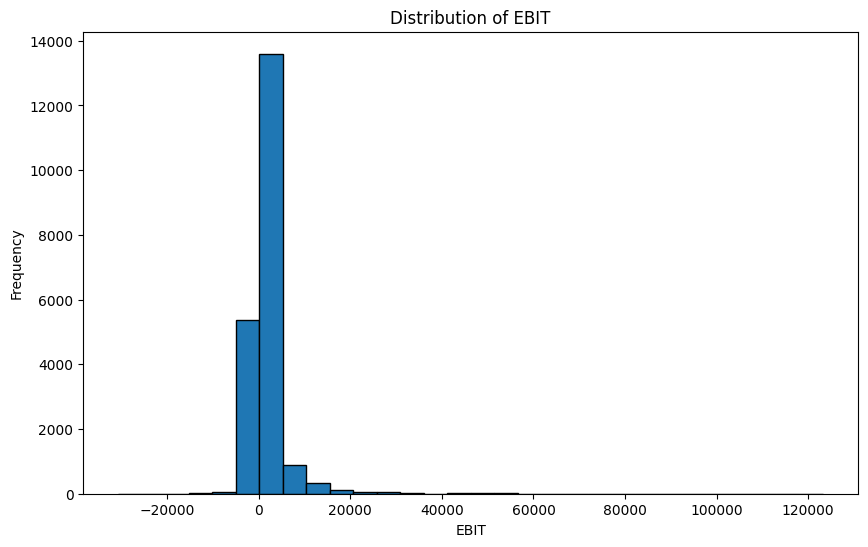

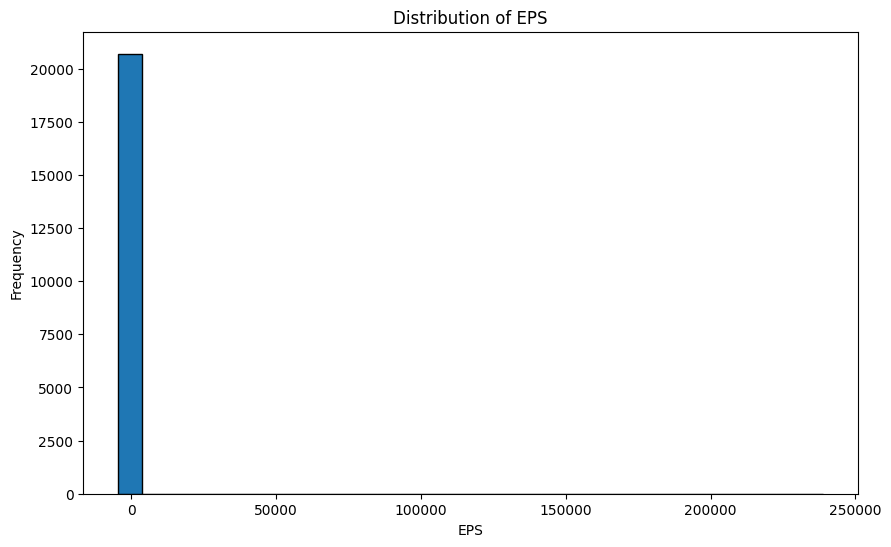

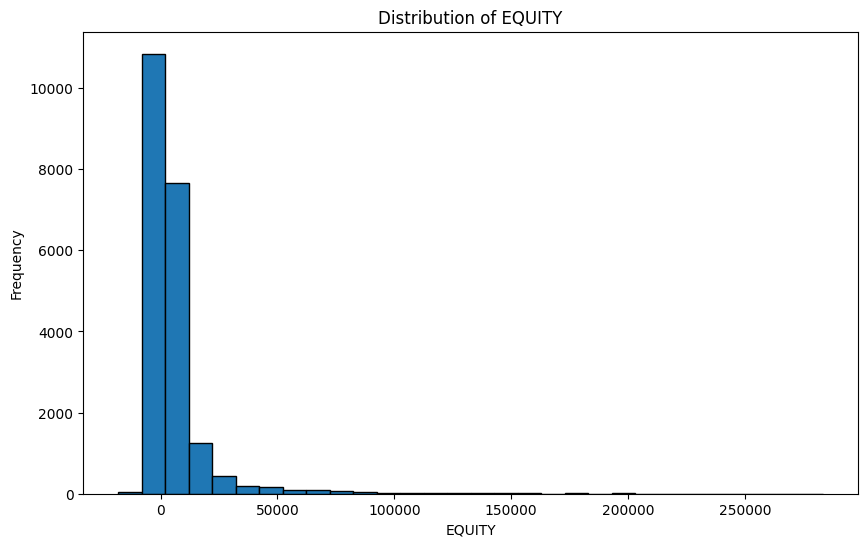

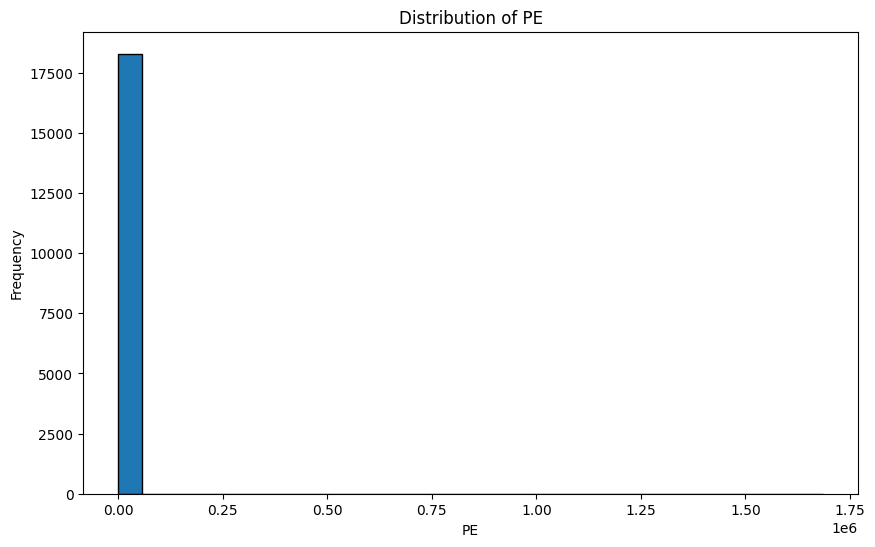

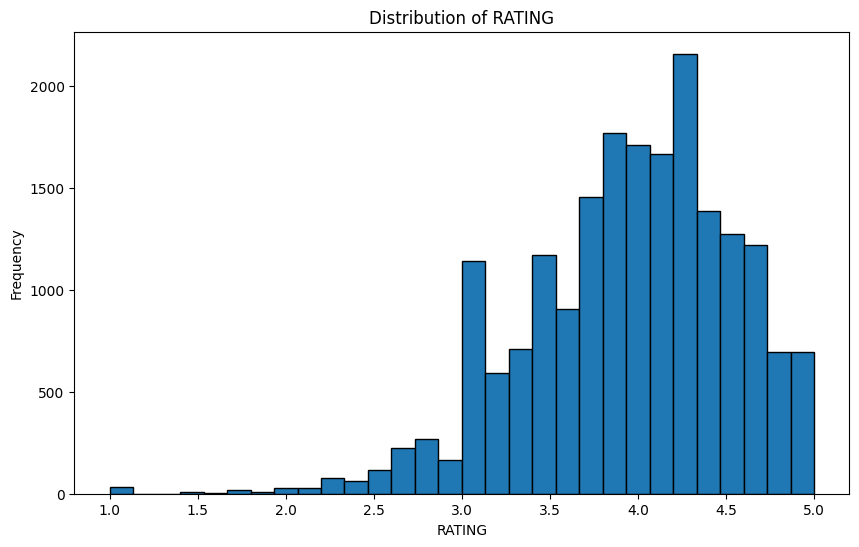

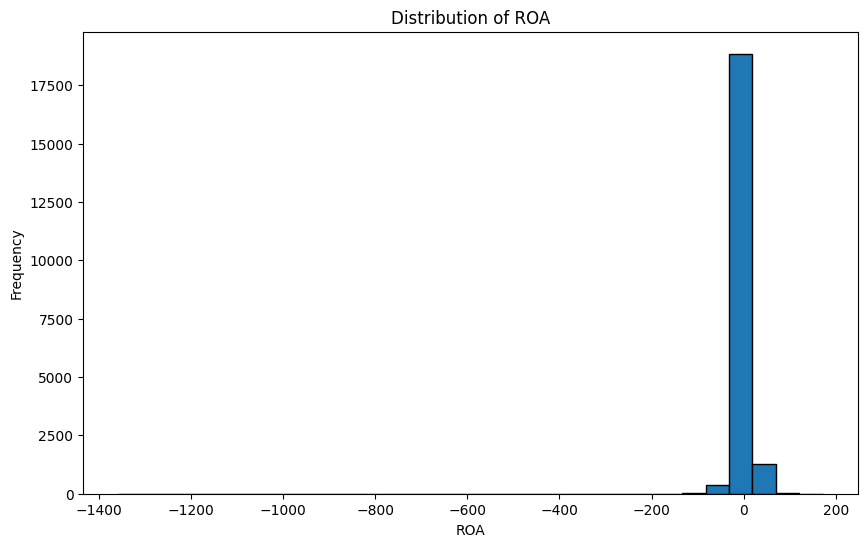

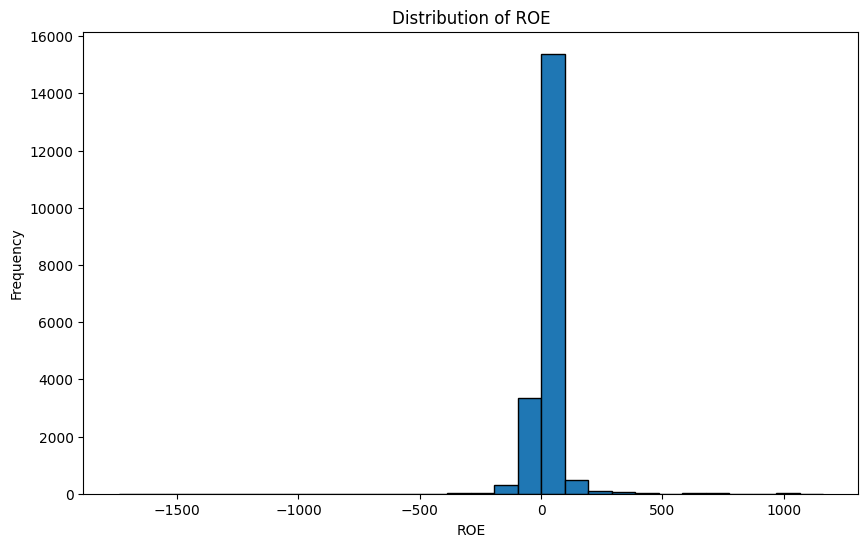

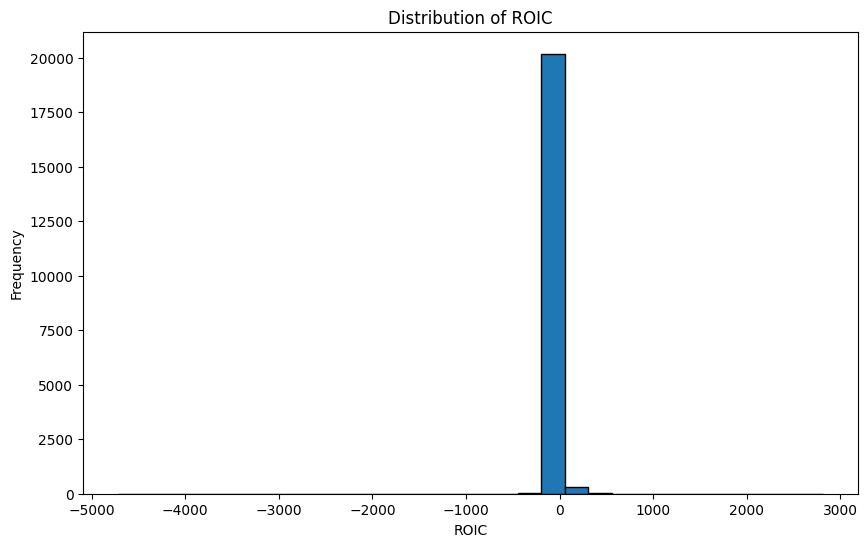

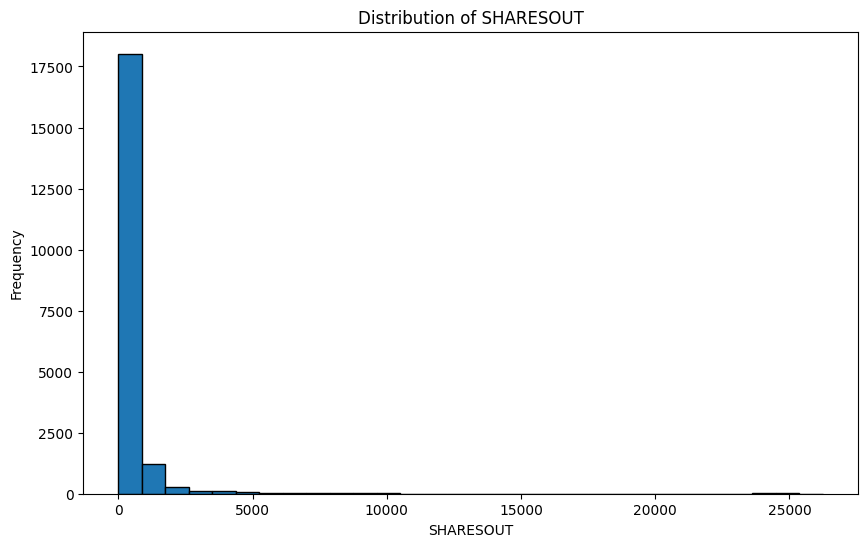

In [ ]:
# plot histograms for each of the features
features = [
    "DE", "EBIT", "EPS", "EQUITY", "PE",
    "RATING", "ROA", "ROE", "ROIC", "SHARESOUT"
]

for feature in features:
    _ = plt.figure(figsize=(10, 6))
    _ = plt.hist(merged_data[feature], bins=30, edgecolor="k")
    _ = plt.title(f"Distribution of {feature}")
    _ = plt.xlabel(feature)
    _ = plt.ylabel("Frequency")
    plt.show()

<Figure size 1000x600 with 0 Axes>

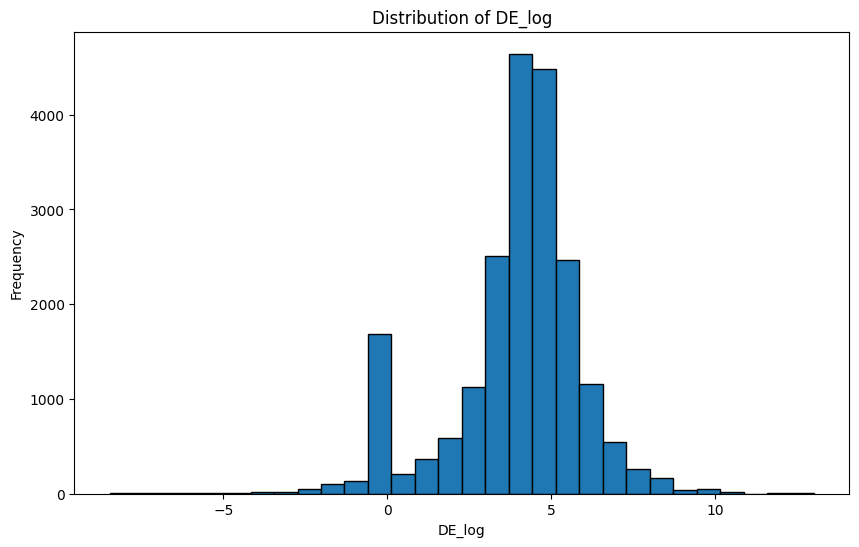

<Figure size 1000x600 with 0 Axes>

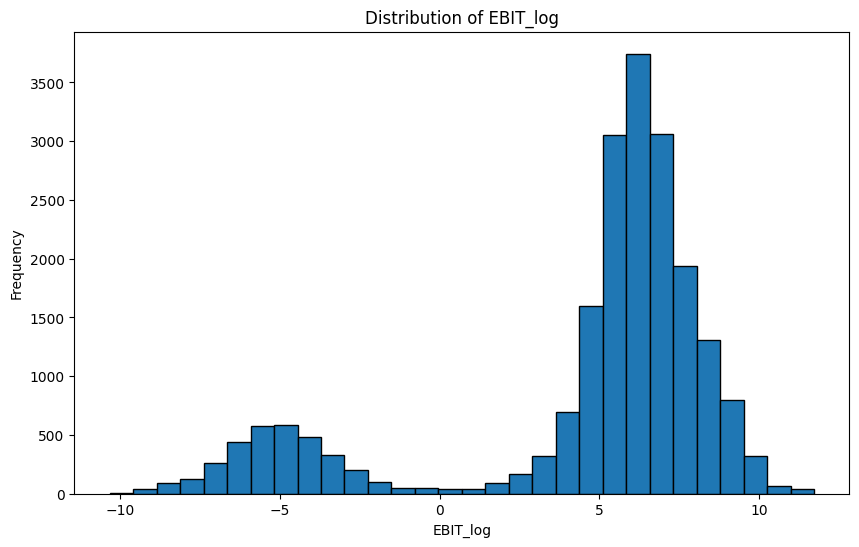

<Figure size 1000x600 with 0 Axes>

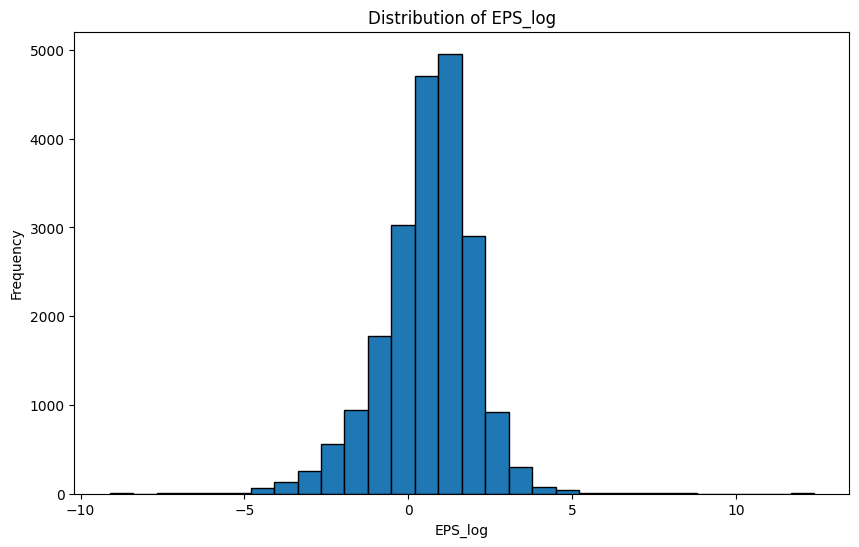

<Figure size 1000x600 with 0 Axes>

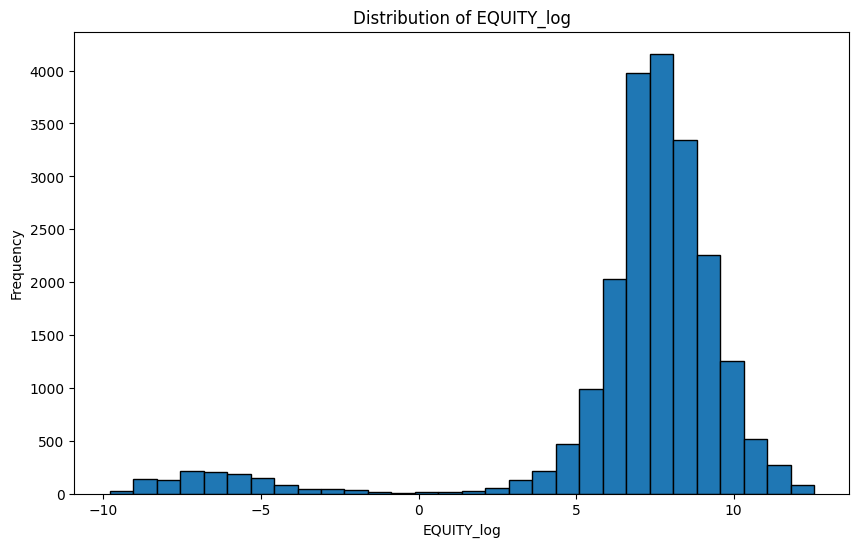

<Figure size 1000x600 with 0 Axes>

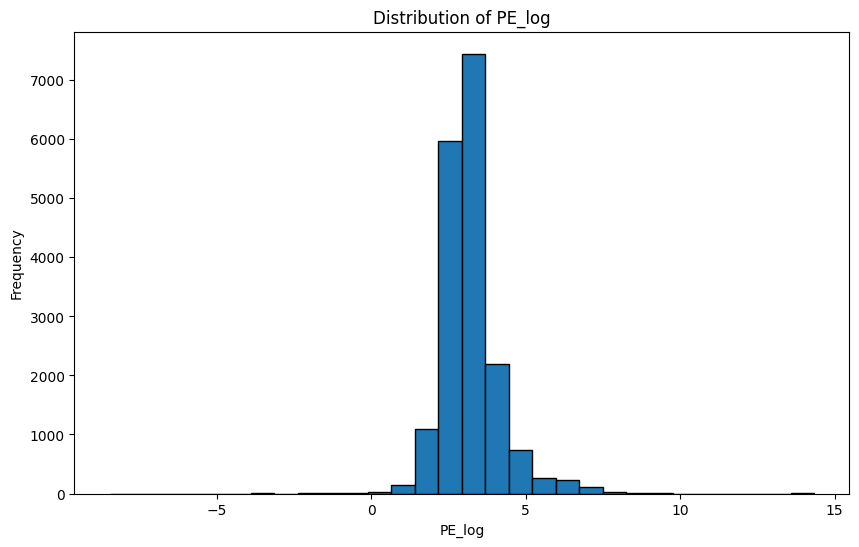

<Figure size 1000x600 with 0 Axes>

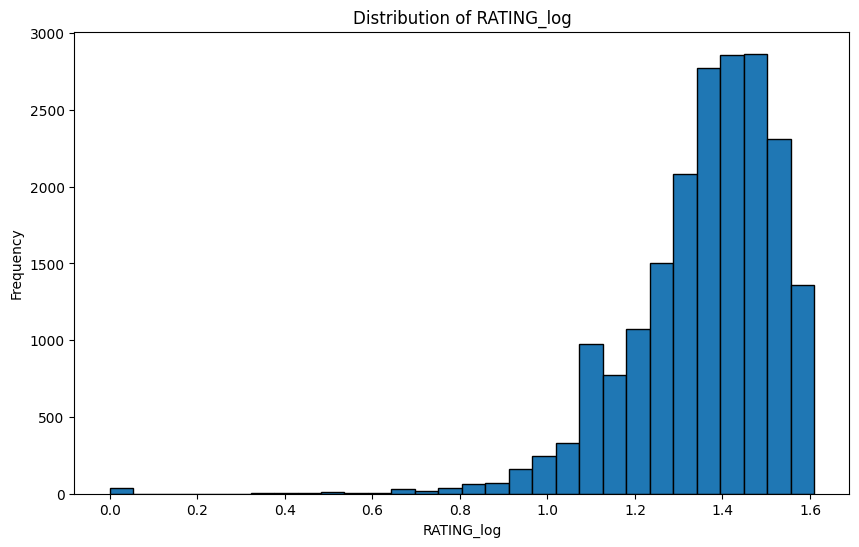

<Figure size 1000x600 with 0 Axes>

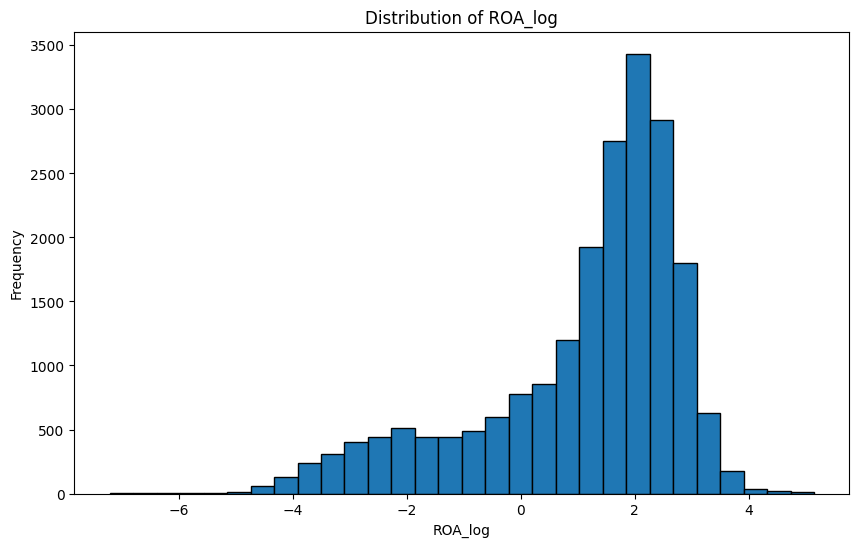

<Figure size 1000x600 with 0 Axes>

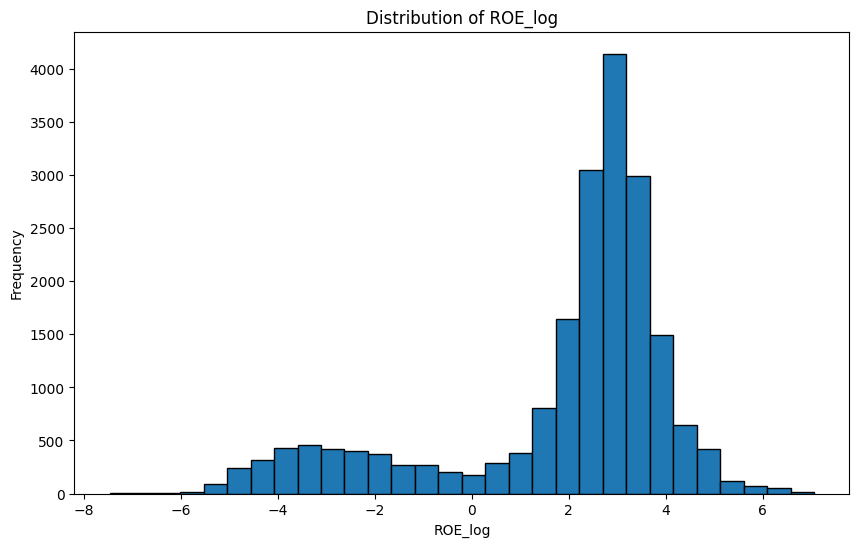

<Figure size 1000x600 with 0 Axes>

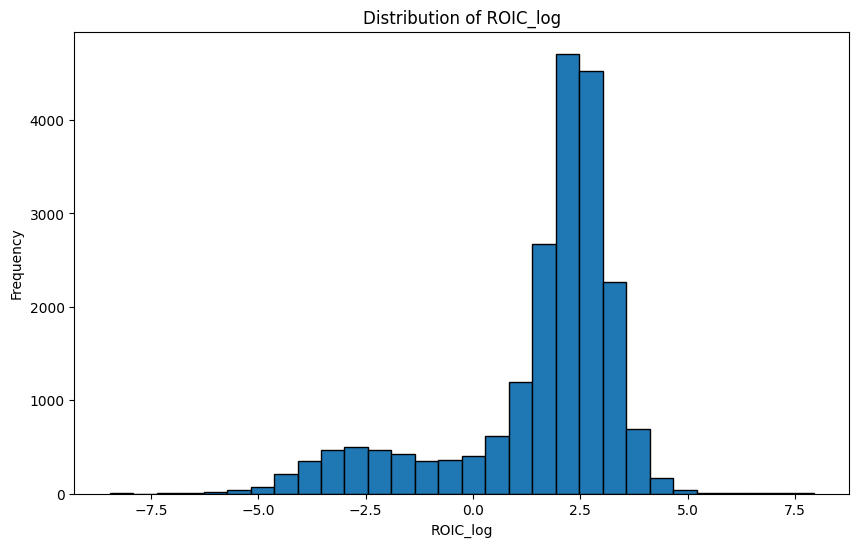

<Figure size 1000x600 with 0 Axes>

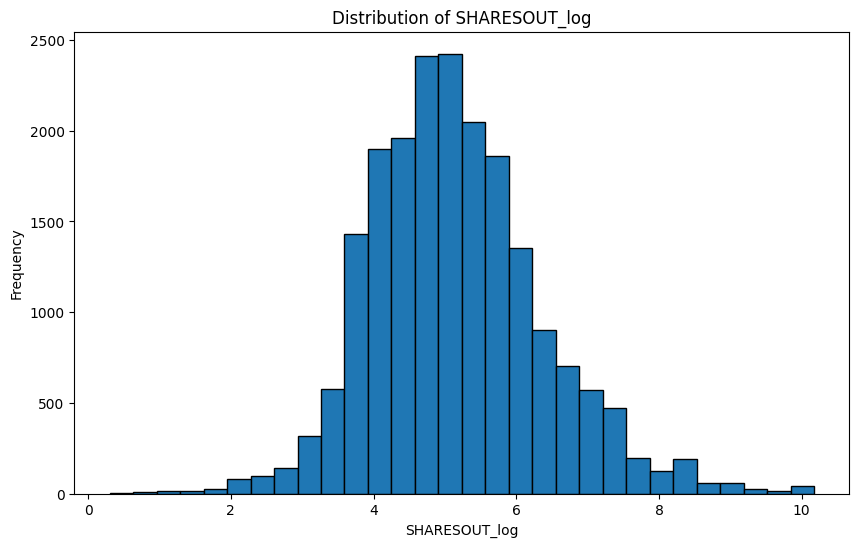

,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,ROA,ROE,ROIC,SHARESOUT,Year,Log_Returns,Log_Returns_Russell,Label,DE_log,EBIT_log,EPS_log,EQUITY_log,PE_log,RATING_log,ROA_log,ROE_log,ROIC_log,SHARESOUT_log
0,2010-11-30,0167866D,76.2621,509.071,0.2973,3445.539,56.2412,4.556,1.2350,2.6568,4.9080,302.40729,2010,0.047984,0.158187,0,4.334176,6.232588,-1.212980,8.144836,4.029650,1.516447,0.211079,0.977126,1.590869,5.711775
1,2010-11-30,0203524D,122.6102,451.600,1.2400,850.500,19.0839,2.556,12.7963,46.8192,18.8763,242.83430,2010,0.047253,0.158187,0,4.809010,6.112797,0.215119,6.745824,2.948846,0.938447,2.549157,3.846294,2.937908,5.492379
2,2010-11-30,0966576D,0.0000,110.400,1.4000,855.900,19.0267,3.706,7.8897,9.5869,8.7006,57.25360,2010,0.034819,0.158187,0,-0.000000,4.704110,0.336479,6.752154,2.945844,1.309956,2.065559,2.260399,2.163393,4.047491
3,2010-11-30,0991739D,29.1482,137.845,2.2000,823.379,29.6981,4.333,9.3151,13.4465,9.2213,48.20770,2010,0.283247,0.158187,1,3.372394,4.926130,0.788462,6.713417,3.391083,1.466262,2.231638,2.598720,2.221517,3.875519
4,2010-11-30,1255459D,69.2959,612.397,2.0600,4438.029,22.3606,4.684,4.0673,8.9383,6.5693,186.72760,2010,0.137429,0.158187,0,4.238386,6.417381,0.722711,8.397966,3.107301,1.544155,1.402982,2.190347,1.882409,5.229651


(21284, 26)

In [ ]:
# for some of them it might make sense to take log to get rid of skewness
for feature in features:
  merged_data["{}_log".format(feature)] = np.log(
      np.abs(merged_data[feature]) + 1e-5
  ) * np.sign(merged_data[feature])
  plt.figure(figsize=(10, 6))
  _ = plt.hist(merged_data["{}_log".format(feature)], bins=30, edgecolor="k")
  _ = plt.title(f"Distribution of {feature}_log")
  _ = plt.xlabel(f"{feature}_log")
  _ = plt.ylabel("Frequency")
  plt.show()

merged_data.head()
merged_data.shape

In [ ]:
# splitting the data
# training: 2010-2021, 2022-2023

train_mask = (merged_data["Year"] >= 2010) & (merged_data["Year"] <= 2021)
test_mask = (merged_data["Year"] >= 2022) & (merged_data["Year"] <= 2023)

train_data = merged_data[train_mask]
test_data = merged_data[test_mask]

# remove rows with null values
train_data = train_data.dropna()
test_data = test_data.dropna()

train_data.head()
train_data.shape

test_data.head()
test_data.shape

,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,ROA,ROE,ROIC,SHARESOUT,Year,Log_Returns,Log_Returns_Russell,Label,DE_log,EBIT_log,EPS_log,EQUITY_log,PE_log,RATING_log,ROA_log,ROE_log,ROIC_log,SHARESOUT_log
0,2010-11-30,0167866D,76.2621,509.071,0.2973,3445.539,56.2412,4.556,1.2350,2.6568,4.9080,302.40729,2010,0.047984,0.158187,0,4.334176,6.232588,-1.212980,8.144836,4.029650,1.516447,0.211079,0.977126,1.590869,5.711775
1,2010-11-30,0203524D,122.6102,451.600,1.2400,850.500,19.0839,2.556,12.7963,46.8192,18.8763,242.83430,2010,0.047253,0.158187,0,4.809010,6.112797,0.215119,6.745824,2.948846,0.938447,2.549157,3.846294,2.937908,5.492379
2,2010-11-30,0966576D,0.0000,110.400,1.4000,855.900,19.0267,3.706,7.8897,9.5869,8.7006,57.25360,2010,0.034819,0.158187,0,-0.000000,4.704110,0.336479,6.752154,2.945844,1.309956,2.065559,2.260399,2.163393,4.047491
3,2010-11-30,0991739D,29.1482,137.845,2.2000,823.379,29.6981,4.333,9.3151,13.4465,9.2213,48.20770,2010,0.283247,0.158187,1,3.372394,4.926130,0.788462,6.713417,3.391083,1.466262,2.231638,2.598720,2.221517,3.875519
4,2010-11-30,1255459D,69.2959,612.397,2.0600,4438.029,22.3606,4.684,4.0673,8.9383,6.5693,186.72760,2010,0.137429,0.158187,0,4.238386,6.417381,0.722711,8.397966,3.107301,1.544155,1.402982,2.190347,1.882409,5.229651


(14568, 26)

,Date,Ticker,DE,EBIT,EPS,EQUITY,PE,RATING,ROA,ROE,ROIC,SHARESOUT,Year,Log_Returns,Log_Returns_Russell,Label,DE_log,EBIT_log,EPS_log,EQUITY_log,PE_log,RATING_log,ROA_log,ROE_log,ROIC_log,SHARESOUT_log
18439,2022-11-30,1697067D,77.7421,5590.0,8.440,21489.0,10.9212,5.000,7.4175,23.2551,10.5459,1223.44493,2022,0.000000,-0.354032,1,4.353397,8.628735,2.132983,9.975296,2.390707,1.609440,2.003843,3.146525,2.355738,7.109426
18440,2022-11-30,1715651D,8.4690,1565.0,1.558,24749.0,34.6985,3.000,2.6435,4.7057,4.8415,867.80600,2022,0.000000,-0.354032,1,2.136414,7.355641,0.443409,10.116540,3.546697,1.098616,0.972108,1.548777,1.577227,6.765968
18441,2022-11-30,AA,28.7752,690.0,-0.680,6589.0,9.7062,3.833,-0.8260,-2.5236,8.2604,176.93717,2022,-0.097637,-0.354032,1,3.359514,6.536692,0.385648,8.793157,2.272766,1.343650,0.191148,-0.925690,2.111474,5.175795
18442,2022-11-30,AAL,643.1704,1607.0,0.200,-5799.0,30.5834,3.000,0.1936,56.8153,2.1028,649.90089,2022,-0.320726,-0.354032,1,6.466410,7.382124,-1.609388,-8.665441,3.420458,1.098616,-1.641909,4.039806,0.743275,6.476820
18443,2022-11-30,AAL,643.1704,1607.0,0.200,-5799.0,30.5834,3.000,0.1936,56.8153,2.1028,649.90089,2022,-0.320726,-0.354032,1,6.466410,7.382124,-1.609388,-8.665441,3.420458,1.098616,-1.641909,4.039806,0.743275,6.476820


(2486, 26)

# Models

In [ ]:
# inputs and outputs
features = [
    "DE", "EBIT", "EPS", "EQUITY", "PE",
    "RATING", "ROA", "ROE", "ROIC", "SHARESOUT"
]
features = ["{}_log".format(feature) for feature in features]

X_train, y_train = train_data[features], train_data["Label"]
X_test, y_test = test_data[features], test_data["Label"]

In [ ]:
# logistic regression
model = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", LogisticRegression())
])
model.fit(X_train, y_train)

# make predictions
y_pred = model.predict(X_test)

# train and test accuracies
train_acc = accuracy_score(y_train, model.predict(X_train))
test_acc = accuracy_score(y_test, y_pred)

print("Train Accuracy: {:.2f}%".format(train_acc * 100))
print("Test Accuracy: {:.2f}%".format(test_acc * 100))

# confusion matrix and report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', LogisticRegression())])

Train Accuracy: 60.62%
Test Accuracy: 54.26%
Confusion Matrix:
 [[778 432]
 [705 571]]
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.64      0.58      1210
           1       0.57      0.45      0.50      1276

    accuracy                           0.54      2486
   macro avg       0.55      0.55      0.54      2486
weighted avg       0.55      0.54      0.54      2486



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In-Sample:
Accuracy: 0.8990252608456892
Precision: 0.9098525989138867
Recall: 0.8682262363044122
F1: 0.8885521630426547
Confusion Matrix:
[[7233  581]
 [ 890 5864]]
Out-of-Sample:
Accuracy: 0.5543041029766693
Precision: 0.5735551663747811
Recall: 0.5133228840125392
F1: 0.5417700578990902
Confusion Matrix:
[[723 487]
 [621 655]]


<Figure size 1000x500 with 0 Axes>

<BarContainer object of 10 artists>

Text(0.5, 0, 'Feature Importance')

Text(0, 0.5, 'Feature Name')

Text(0.5, 1.0, 'Feature Importance')

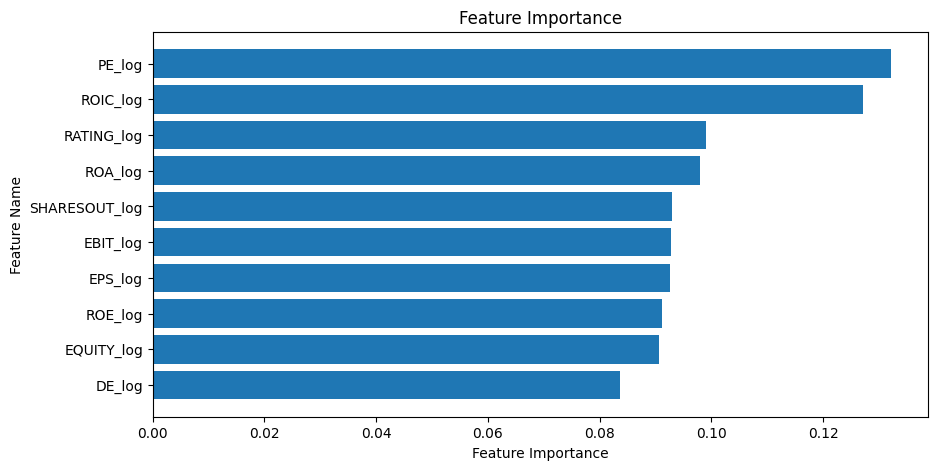

In [69]:
# xgboost model
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)

print("In-Sample:")
y_train_pred = xgb_model.predict(X_train)
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Precision: {}".format(precision_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred)))
print("F1: {}".format(f1_score(y_train, y_train_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Out-of-Sample:")
y_val_pred = xgb_model.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test, y_val_pred)))
print("Precision: {}".format(precision_score(y_test, y_val_pred)))
print("Recall: {}".format(recall_score(y_test, y_val_pred)))
print("F1: {}".format(f1_score(y_test, y_val_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_val_pred))

# feature importances
# the plot of feature importances
feature_importance_df = pd.DataFrame(
    xgb_model.feature_importances_,
    index = X_train.columns,
    columns=["importance"]
).rename_axis("feature").reset_index().sort_values(
    by = ["importance"], ascending=True
)
plt.figure(figsize = (10, 5))
plt.barh(feature_importance_df["feature"], feature_importance_df["importance"])
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

In [75]:
# neural network
nn_model = keras.Sequential()
nn_model.add(keras.layers.Dense(
    128, input_dim=X_train.shape[1], activation='relu',
    kernel_regularizer=keras.regularizers.l2(0.01),
    kernel_initializer="he_normal"
))
nn_model.add(keras.layers.BatchNormalization())
nn_model.add(keras.layers.Dropout(rate=0.2))
nn_model.add(keras.layers.Dense(
    64, activation='relu',
    kernel_regularizer=keras.regularizers.l2(0.01),
    kernel_initializer="he_normal"
))
nn_model.add(keras.layers.BatchNormalization())
nn_model.add(keras.layers.Dropout(rate=0.2))
# nn_model.add(keras.layers.Dense(
#     32, activation='relu',
#     kernel_regularizer=keras.regularizers.l2(0.01),
#     kernel_initializer="he_normal"
# ))
nn_model.add(keras.layers.Dense(1, activation='sigmoid'))

nn_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
nn_model.fit(X_train, y_train, epochs=10, batch_size=512, validation_data=(X_test, y_test))

print("In-Sample:")
y_train_pred = nn_model.predict(X_train)
y_train_pred = (y_train_pred > 0.5).astype(int)
print("Accuracy: {}".format(accuracy_score(y_train, y_train_pred)))
print("Precision: {}".format(precision_score(y_train, y_train_pred)))
print("Recall: {}".format(recall_score(y_train, y_train_pred)))
print("F1: {}".format(f1_score(y_train, y_train_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_train, y_train_pred))

print("Out-of-Sample:")
y_val_pred = nn_model.predict(X_test)
y_val_pred = (y_val_pred > 0.5).astype(int)
print("Accuracy: {}".format(accuracy_score(y_test, y_val_pred)))
print("Precision: {}".format(precision_score(y_test, y_val_pred)))
print("Recall: {}".format(recall_score(y_test, y_val_pred)))
print("F1: {}".format(f1_score(y_test, y_val_pred)))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_val_pred))

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step - accuracy: 0.5215 - loss: 4.6294 - val_accuracy: 0.5451 - val_loss: 4.7537
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5553 - loss: 4.0676 - val_accuracy: 0.5487 - val_loss: 3.8256
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5596 - loss: 3.6311 - val_accuracy: 0.5575 - val_loss: 3.3235
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5750 - loss: 3.2603 - val_accuracy: 0.5282 - val_loss: 3.0026
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5761 - loss: 2.9522 - val_accuracy: 0.5286 - val_loss: 2.7345
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5848 - loss: 2.6764 - val_accuracy: 0.5455 - val_loss: 2.4959
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5824 - loss: 2.4556 - val_accuracy: 0.5205 - val_loss: 2.2995
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5873 - loss: 2.2431 - val_accuracy: 0.5559 - val_lo

In-Sample:
456/456 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Accuracy: 0.5987781438769907
Precision: 0.6513486513486514
Recall: 0.2896061593129997
F1: 0.4009429127805678
Confusion Matrix:
[[6767 1047]
 [4798 1956]]
Out-of-Sample:
78/78 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Accuracy: 0.5221238938053098
Precision: 0.5730897009966778
Recall: 0.27037617554858934
F1: 0.36741214057507987
Confusion Matrix:
[[953 257]
 [931 345]]
